<img src='http://www.kontext.edu.rs/files/images/2015/8/12/FONIS.png' height='242' width='242' />
<div align='center'>
    <h1>Logistička regresija</h1>
</div>

<br/>

<div align='left'>
    <small>Datum: 26.12.2018 <br\> </small>
    <small>Mesto: Univerzitet u Beogradu - Fakultet organizacionih nauka <br\> </small>
    <small>Fonis Datageeks</small>
</div>

### Klasifikacija

Jedan od zadataka mašinskog učenja jeste da napravimo funkciju, odnosno model, koji za cilj ima da diskriminiše između dve klase ili kategorije. Primera ima mnogo i veoma su raznoliki. Možemo praviti model da li će pasti kiša ili ne (meteorologija) ili da predviđamo da li će klijent vratiti kredit ili ne (finansije), uzeti neki proizvod (marketing), da li pacijenta treba operisati ili ne (medicina) i slično. Drugim rečima, domen primene klasifikacionih modela je praktično neograničen. Dobra stvar je što je metodologija pravljenja ovakvih modela ista za svaki domel, ma koliko kompleksan on bio. Ovakvi problemi se nazivaju **klasifikacija** i veoma su dobro istraženi i široko se koriste.

<img src='https://cdn-images-1.medium.com/max/1600/0*WE3Sz--1NUEWBmUR.' height = '442' width = '442'/>

### Linearna i logistička regresija iz Sklearn-a

Da li možemo da koristimo linearnu regresiju kao klasifikator?

Kako izgleda linearna regresija?

Linearna regresija predstavlja sumu otežanih vrednosti (suma koeficijent puta vrednost) gde mi želimo da ostvarimo najmanju grešku. Greška je definisana tako da je razlika između stvarne i predviđene vrednosti što niža. Pritom, razliku kvadriramo kako bi ona uvek bila pozitivna.

In [20]:
from IPython.display import display, Math, Latex
%matplotlib inline
display(Math(r'L(w) = \frac{1}{2n} \sum_{i = 1}^n{(y_i - w^Tx_i)^2}'))

<IPython.core.display.Math object>

In [21]:
display(Math(r'y = Xw'))

display(Math(r'y_i = \sum_{j = 0}^m{w_jX_ij}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
# UCITAVANJE SKUPA PODATAKA
from sklearn import datasets
iris = datasets.load_iris()

# PODACI ZA LINEARNU REGRESIJU
X_lin_reg = iris.data[:, 2]
y_lin_reg = (iris.target != 0) * 1

In [23]:
# UCITAVANJE LINEARNE REGRESIJE
from sklearn.linear_model import LinearRegression

# UCENJE LINEARNE REGRESIJE
model = LinearRegression(fit_intercept = False)
model.fit(X = X_lin_reg.reshape(-1, 1), y = y_lin_reg)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [24]:
# PREDVIDJANJE VREDNOSTI
import numpy as np

# DEFINISANJE VREDNOSTI I PREDVIDJANJA
values_to_predict = np.linspace(0.5, 7.5, 50)
predictions_lin_reg = model.predict(values_to_predict.reshape(-1, 1))

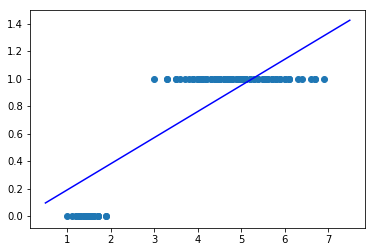

In [25]:
# CRTANJE PREDVIDJANJA
import matplotlib.pyplot as plt

plt.scatter(X_lin_reg, y_lin_reg)
plt.plot(values_to_predict, predictions_lin_reg, color = 'blue')

plt.show()

Očigledno da linearna regresija nije prikladna. Imamo dve moguće vrednosti (0 i 1), a naša predviđanja mogu biti bilo koji broj. Čak i u opsegu naših podataka, vidimo da predviđanje može biti iznad 1. Kako doneti odluku kojoj klasi nešto pripada?

Zbog toga je nastala logistička regresija koja rešava navedeni problem. Međutim, prvo da vidimo kako ona izgleda.

In [26]:
# PODACI ZA LOGISTICKU REGRESIJU
X_log_reg = iris.data[:, 2]
y_log_reg = (iris.target != 0) * 1

# UCITAVANJE LOGISTICKE REGRESIJE
from sklearn.linear_model import LogisticRegression

# UCENJE LOGISTICKE REGRESIJE
model = LogisticRegression(fit_intercept = False)
model.fit(X = X_log_reg.reshape(-1, 1), y = y_log_reg)

/home/dimi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
# DEFINISANJE VREDNOSTI I PREDVIDJANJA
values_to_predict = np.linspace(0.5, 7.5, 50)
predictions_log_reg = model.predict_proba(values_to_predict.reshape(-1, 1))

In [28]:
values_to_predict

array([0.5       , 0.64285714, 0.78571429, 0.92857143, 1.07142857,
       1.21428571, 1.35714286, 1.5       , 1.64285714, 1.78571429,
       1.92857143, 2.07142857, 2.21428571, 2.35714286, 2.5       ,
       2.64285714, 2.78571429, 2.92857143, 3.07142857, 3.21428571,
       3.35714286, 3.5       , 3.64285714, 3.78571429, 3.92857143,
       4.07142857, 4.21428571, 4.35714286, 4.5       , 4.64285714,
       4.78571429, 4.92857143, 5.07142857, 5.21428571, 5.35714286,
       5.5       , 5.64285714, 5.78571429, 5.92857143, 6.07142857,
       6.21428571, 6.35714286, 6.5       , 6.64285714, 6.78571429,
       6.92857143, 7.07142857, 7.21428571, 7.35714286, 7.5       ])

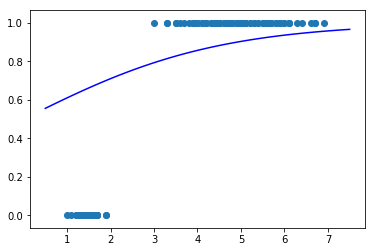

In [29]:
# CRTANJE PREDVIDJANJA
plt.scatter(X_log_reg, y_log_reg)
plt.plot(values_to_predict, predictions_log_reg[:, 1], color = 'blue')

plt.show()

Kada bismo imali duži interval, odnosno vrednosti koje su daleko veće od 7 i daleko manje od 1?

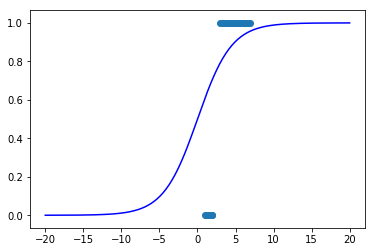

In [10]:
# DEFINISANJE VREDNOSTI I PREDVIDJANJA
values_to_predict = np.linspace(-20, 20, 200)
predictions_log_reg = model.predict_proba(values_to_predict.reshape(-1, 1))

# CRTANJE PREDVIDJANJA
plt.scatter(X_log_reg, y_log_reg)
plt.plot(values_to_predict, predictions_log_reg[:, 1], color = 'blue')

plt.show()

Definitivno se nešto drugačije dešava u odnosu na linearnu regresiju, ali šta je to drugačije? Zašto logistička regresija izgleda kao slovo S, a linearna regresija izgleda kao... linija.

Razlog tome je što logistička regresija koristi logističku funkciju za predviđanje, odnosno sigmoidnu funkciju. Odnosno:

In [11]:
display(Math(r'log(\frac{p_i}{1 - p_i}) = \sum_{j = 0}^m{w_jX_{ij}}'))

<IPython.core.display.Math object>

Odnosno, kada izvedemo funkciju tako da nam sa leve strane ostane verovatnoća dobijamo:

In [12]:
display(Math(r'p_i = \frac{1}{1 + \exp^{-\sum_{j = 0}^m{w_jX_{ij}}}}'))

<IPython.core.display.Math object>

Ova funkcija se naziva sigmoid i zbog nje funkcija nikada neće biti manja od 0, niti može biti veća od 1. Čak, nikada neće biti tačno 0, niti tačno 1 već će samo težiti tom broju.

Funkcija cilja koju želimo da smanjimo (isto što i srednja kvadratna greška kod linearne regresije) odgovara Bernulijevoj raspodeli i izgleda:

In [13]:
display(Math(r'L(w) = - \frac{1}{n} \sum_{i = 1}^{n}{(y_i log(p_i) + (1 - y_i) log(1 - p_i))}'))

<IPython.core.display.Math object>

### Logistička regresija od nule 

Kodiraćemo sve kao funkcije koje možemo da pozovemo.

Prvo kodiramo funkciju cilja.

In [39]:
def logistic_loss(y, h):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [40]:
# STVARNE VREDNOSTI
stvarne = y_log_reg

# PREDVIDJENE VREDNOSTI
predvidjene = model.predict_proba(X_log_reg.reshape(-1, 1))[:, 1]

logistic_loss(stvarne, predvidjene)

0.43224220745959324

Kako izgleda logistički trošak?

<img src='https://mlcourse.ai/notebooks/blob/master/img/logloss_margin_eng.png' width = '440' height = '440'/>

Treba nam funkcija koja će dati predviđanje.

In [41]:
def sigmoid(z):
    return(1/(1 + np.exp(-z)))

Napravili smo  funkciju za funkciju cilja i funkciju za predviđanja, sada nam treba procedura koja će menjati koeficijente tako da smanjujemo funkciju cilja. Ta procedura je iterativna optimizaciona procedura koja se zove gradijentni spust.

Učitaćemo i malo više podataka.

In [45]:
X = iris.data[:, :4]
y = (iris.target != 0) * 1

ws = np.zeros(X.shape[1])
z = np.dot(X, ws)
# UBACIVANJE Z U SIGMOIG
h = sigmoid(z)
logistic_loss(y, h)
gradient = np.dot(X.T, (h - y)) / y.size
gradient
ws -= 0.01 * gradient
ws

array([0.01253   , 0.00386   , 0.01391667, 0.00517667])

In [48]:
# UČITAVANJE PODATAKA
X = iris.data[:, :4]
y = (iris.target != 0) * 1

# POČETNE VREDNOSTI KOEFICIJENATA
ws = np.zeros(X.shape[1])

# U 100 ITERACIJA MENJAJ KOEFICIJENTE TAKO DA JE GREŠKA ŠTO MANJA
for i in range(10):
    # ODREĐIVANJE Z (MNOŽENJE KOEFICIJENATA SA VREDNOSTIMA)
    z = np.dot(X, ws)
    # UBACIVANJE Z U SIGMOIG
    h = sigmoid(z)
    
    print(f'Logistic Loss: {logistic_loss(y, h)}')
    
    # RAČUNANJE GRADIJENTA
    gradient = np.dot(X.T, (h - y)) / y.size
    
    # AŽURIRANJE KOEFICIJENATA
    # OBRATITI PAŽNJU NA OVAJ BROJ 0.01
    ws -= 0.01 * gradient

Logistic Loss: 0.6931471805599454
Logistic Loss: 0.6566535983880368
Logistic Loss: 0.629491930212068
Logistic Loss: 0.6089539519260228
Logistic Loss: 0.593113747648508
Logistic Loss: 0.5806201365322219
Logistic Loss: 0.5705281133612498
Logistic Loss: 0.5621748185397712
Logistic Loss: 0.5550924024543279
Logistic Loss: 0.5489480596827029


Koje su vrednosti koeficijenata? Kako se oni tumače?

In [49]:
ws

array([0.06057215, 0.00631488, 0.09391385, 0.03682788])

Kako dobijamo predviđanja?

In [50]:
sigmoid(np.dot(X, ws))

array([0.6153518 , 0.61173074, 0.606912  , 0.60979352, 0.61406677,
       0.62857359, 0.60888558, 0.61599131, 0.60436245, 0.61323554,
       0.62215166, 0.61534698, 0.60941483, 0.59541406, 0.62166944,
       0.62916788, 0.61976168, 0.61622313, 0.63180304, 0.61888862,
       0.62611348, 0.61960805, 0.59932295, 0.62429636, 0.62199363,
       0.61761401, 0.61994732, 0.61900182, 0.61663524, 0.61361288,
       0.61489848, 0.62343695, 0.61902685, 0.62211012, 0.61410865,
       0.60900473, 0.61885768, 0.61175595, 0.60226598, 0.61742311,
       0.61256316, 0.60353955, 0.60256847, 0.62182972, 0.62856883,
       0.61116662, 0.62023416, 0.60770715, 0.62072669, 0.6136177 ,
       0.71852701, 0.70800687, 0.72170678, 0.683781  , 0.71067121,
       0.69708001, 0.71151704, 0.65896894, 0.71053201, 0.67914567,
       0.66396561, 0.69550855, 0.6877903 , 0.70697915, 0.67775709,
       0.70892928, 0.6976227 , 0.68788357, 0.70418237, 0.68173701,
       0.70985089, 0.69225938, 0.71357512, 0.70531974, 0.70217

Iskodirali smo logističku regresiju od nule. Međutim, ovakav kod nije preterano koristan. Voleli bismo da možemo nekako da ga upakujemo kako bi drugi mogli da ga koriste, bez da znaju ikakvu matematiku ispod.

In [55]:
class FONISLogisticRegression:
    # KONSTRUKTOR
    def __init__(self, lr = 0.01, num_item = 100, fit_intercept = True, verbose = True):
        self.lr = lr
        self.num_item = num_item
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    # PREDVIDJANJA
    def __sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    # FUNKCIJA CILJA
    def __logistic_loss(self, y, h):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    # UCENJE KOEFICIJENATA
    def fit(self, X, y):
        if self.fit_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.concatenate((intercept, X), axis = 1)
        
        self.ws = np.zeros(X.shape[1])
        
        for i in range(self.num_item):
            z = np.dot(X, self.ws)
            h = self.__sigmoid(z)
            if(self.verbose == True and i % 20 == 0):
                print(f'Logistic Loss: {self.__logistic_loss(y, h)}')
            gradient = np.dot(X.T, (h - y)) / y.size
            self.ws -= self.lr * gradient
    
    # PREDVIDJANJE VEROVATNOCE
    def predict_proba(self, X):
        if self.fit_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.concatenate((intercept, X), axis = 1)
        return self.__sigmoid(np.dot(X, self.ws))
    
    # PREDVIDJANJE KLASE
    def predict(self, X, threshold = 0.5):
        return self.predict_proba(X) >= threshold

In [56]:
model = FONISLogisticRegression()

model.fit(X, y)

Logistic Loss: 0.6931471805599454
Logistic Loss: 0.5051185907895568
Logistic Loss: 0.44716684922004096
Logistic Loss: 0.39915275809734463
Logistic Loss: 0.3589682456486836


Koeficijente dobijamo:

In [22]:
model.ws

array([-0.03741323, -0.01724701, -0.2111827 ,  0.42698095,  0.19074081])

Verovatnoće ishoda:

In [23]:
model.predict_proba(X)

array([ 0.44309982,  0.470148  ,  0.44990973,  0.47681757,  0.43831964,
        0.46207407,  0.45517689,  0.4593276 ,  0.47756298,  0.47077225,
        0.44193726,  0.47080765,  0.46582846,  0.43625617,  0.39373207,
        0.41382934,  0.41999643,  0.44781156,  0.46129619,  0.44270932,
        0.47887446,  0.45264704,  0.39846188,  0.49974053,  0.50279795,
        0.49103129,  0.47946066,  0.45323272,  0.44789056,  0.4817728 ,
        0.48661631,  0.46709749,  0.41741328,  0.40532698,  0.47077225,
        0.43809239,  0.43089811,  0.47077225,  0.46166916,  0.45889931,
        0.43770284,  0.50288809,  0.45119061,  0.48371234,  0.48992459,
        0.47533219,  0.44854541,  0.46092668,  0.44236266,  0.45397325,
        0.80844237,  0.79962412,  0.82738892,  0.79214354,  0.81897127,
        0.80881746,  0.81290891,  0.72532194,  0.8097524 ,  0.77468758,
        0.75752547,  0.78696252,  0.78468282,  0.82036138,  0.73859295,
        0.7921804 ,  0.8084517 ,  0.77446962,  0.83181967,  0.77

I predviđen ishod:

In [24]:
model.predict(X, threshold=0.8)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True,  True, False,  True, False, False, False, False,
        True, False, False,  True, False,  True, False,  True, False,
        True,  True, False, False,  True,  True,  True, False, False,
       False, False,  True,  True, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,